In [4]:
#import libraries
import numpy as np
import pandas as pd
from qutip import *
import matplotlib.pyplot as plt

In [5]:
#definition of basis

FBstate = basis(8,0)
Excited_1 = basis(8,1)
Excited_2 = basis(8,2)
Excited_3 = basis(8,3)
Excited_4 = basis(8,4)
GrState_1 = basis(8,5)
GrState_2 = basis(8,6)
dumpstate = basis(8,7)

psi0 = FBstate

H1 = FBstate*Excited_1.dag() + Excited_1*FBstate.dag()
H2 = FBstate*Excited_2.dag() + Excited_2*FBstate.dag()
H3 = FBstate*Excited_3.dag() + Excited_3*FBstate.dag()
H4 = FBstate*Excited_4.dag() + Excited_4*FBstate.dag()
H5 = Excited_1*GrState_1.dag()+GrState_1*Excited_1.dag()
H6 = Excited_2*GrState_1.dag()+GrState_1*Excited_2.dag()
H7 = Excited_3*GrState_1.dag()+GrState_1*Excited_3.dag()
H8 = Excited_4*GrState_1.dag()+GrState_1*Excited_4.dag()
H9 = Excited_2*GrState_2.dag()+GrState_2*Excited_2.dag()
H10 = Excited_3*GrState_2.dag()+GrState_2*Excited_3.dag()
H11 = Excited_4*GrState_2.dag()+GrState_2*Excited_4.dag()
print(H1+H2+H3+H4+H5+H6+H7+H8+H9+H10+H11)


Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 1. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
#define parameters, scattering rate, polarization impurity, Rabi frequencies, pulse delay, pulse duration
Gamma = 2*np.pi*6

eta1 = 0.1
eta2 = 0.1
OmegaP = 2*np.pi*4.3
OmegaS = 2*np.pi*4.3
OmegaFE1 = OmegaP
OmegaFE2 = eta1*0.41*OmegaP
OmegaFE3 = eta1*0.17*OmegaP
OmegaFE4 = eta1*0.9*OmegaP
OmegaE1G0 = OmegaS
OmegaE2G0 = eta2*0.41*OmegaS
OmegaE2G1 = 1*0.64*OmegaS
OmegaE3G0 = eta2*0.17*OmegaS
OmegaE3G1 =1* 0.75*OmegaS
OmegaE4G0 = eta2*0.9*OmegaS
OmegaE4G1 =1* 0.15*OmegaS
D = 0
T = 16

In [19]:
# define interaction hamiltonian for 1 STIRAP cycle
def H0(Delta1,delta1):
    HH = 2*np.pi*Delta1*Excited_1*Excited_1.dag()+(2*np.pi*Delta1-2*np.pi*0.62)*Excited_2*Excited_2.dag()+(2*np.pi*Delta1-2*np.pi*0.08)*Excited_3*Excited_3.dag() +(2*np.pi*Delta1+2*np.pi*0.13)*Excited_4*Excited_4.dag()+ 2*np.pi*delta1*GrState_1*GrState_1.dag()+(2*np.pi*delta1+2*np.pi*0.106)*GrState_2*GrState_2.dag()
    return HH

def H1_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE1*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE1*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H2_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE2*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE2*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H3_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE3*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE3*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H4_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE4*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE4*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H5_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE1G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE1G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H6_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE2G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE2G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H7_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE3G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE3G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H8_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE4G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE4G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H9_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE2G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE2G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H10_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE3G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE3G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H11_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE4G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE4G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH

In [20]:
# total hamiltonian
H = [H0(0,0),[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff],[H5,H5_coeff],[H6,H6_coeff],[H7,H7_coeff],[H8,H8_coeff],[H9,H9_coeff],[H10,H10_coeff],[H11,H11_coeff]]

In [21]:
#generate time steps
t = np.linspace(0,T+D,100)

In [22]:
#calculated using lindblad solver
output = mesolve(H,psi0,t,[np.sqrt(Gamma)*dumpstate*Excited_1.dag(),np.sqrt(Gamma)*dumpstate*Excited_2.dag(),np.sqrt(Gamma)*dumpstate*Excited_3.dag(),np.sqrt(Gamma)*dumpstate*Excited_4.dag()],[FBstate*FBstate.dag(),GrState_1*GrState_1.dag(),GrState_2*GrState_2.dag(),dumpstate*dumpstate.dag()])

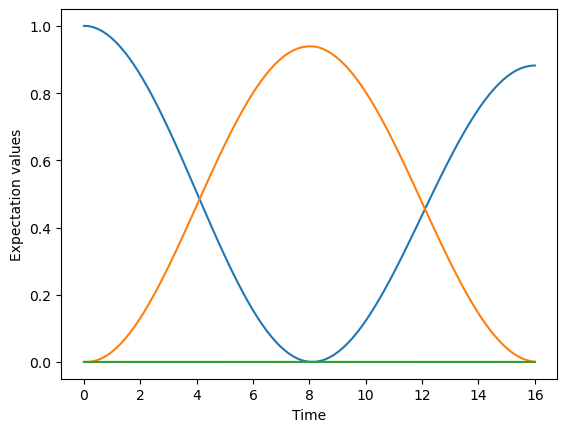

0.8822237377223531

In [23]:
fig, ax = plt.subplots()
ax.plot(t,output.expect[0])
ax.plot(t,output.expect[1])
ax.plot(t,output.expect[2])
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
plt.show() 
output.expect[0][99]


In [24]:
#calculate one photon curve
def SinglePhotonDetuning(d1,d2):
    t = np.linspace(0,T+D,100)
    p = []
    pp=[]
    DD = []
    for d in np.linspace(d1,d2,50):
        H = [H0(d,0.0),[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff],[H5,H5_coeff],[H6,H6_coeff],[H7,H7_coeff],[H8,H8_coeff],[H9,H9_coeff],[H10,H10_coeff],[H11,H11_coeff]]
        output = mesolve(H,psi0,t,[np.sqrt(Gamma)*dumpstate*Excited_1.dag(),np.sqrt(Gamma)*dumpstate*Excited_2.dag(),np.sqrt(Gamma)*dumpstate*Excited_3.dag(),np.sqrt(Gamma)*dumpstate*Excited_4.dag()],[GrState_1*GrState_1.dag(),FBstate*FBstate.dag(),GrState_2*GrState_2.dag()])
        p.append(output.expect[0][49]*100)
        pp.append(output.expect[2][49]*100)
        DD.append(d)
    fig, ax = plt.subplots()
    ax.scatter(DD,p,marker = "o")
    ax.scatter(DD,pp,marker = "o")
    ax.set_xlabel('Detuning') 
    ax.set_ylabel('Expectation values') 
    plt.show() 
    data = {'Detuning' : DD,'Ground State Population':p, 'Ground State 2 Population':pp}
    df = pd.DataFrame(data)
    df.to_csv(r'C:\Users\abyan\Documents\singlephotondetuning_eta_ratio1to3.csv',index = False,header = True)
    return DD,p

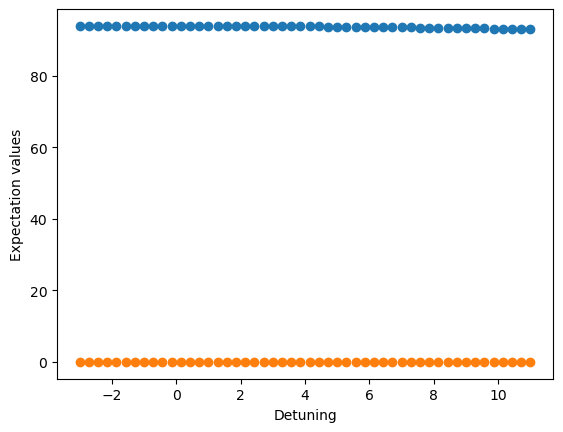

([-3.0,
  -2.7142857142857144,
  -2.428571428571429,
  -2.142857142857143,
  -1.8571428571428572,
  -1.5714285714285716,
  -1.2857142857142858,
  -1.0,
  -0.7142857142857144,
  -0.4285714285714288,
  -0.14285714285714324,
  0.1428571428571428,
  0.4285714285714284,
  0.714285714285714,
  1.0,
  1.2857142857142856,
  1.5714285714285712,
  1.8571428571428568,
  2.1428571428571423,
  2.428571428571428,
  2.7142857142857135,
  3.0,
  3.2857142857142856,
  3.571428571428571,
  3.8571428571428568,
  4.142857142857142,
  4.428571428571428,
  4.7142857142857135,
  5.0,
  5.285714285714285,
  5.571428571428571,
  5.857142857142856,
  6.142857142857142,
  6.428571428571429,
  6.7142857142857135,
  7.0,
  7.285714285714285,
  7.571428571428571,
  7.857142857142856,
  8.142857142857142,
  8.428571428571427,
  8.714285714285714,
  9.0,
  9.285714285714285,
  9.571428571428571,
  9.857142857142856,
  10.142857142857142,
  10.428571428571427,
  10.714285714285714,
  11.0],
 [93.81888438315444,
  93.8

In [25]:
SinglePhotonDetuning(-3,11)